In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target

print(X.shape)

(442, 10)


In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__, cross_val_score(model, X, y).mean()))

Ridge: 0.410174971340889
Lasso: 0.3375593674654274


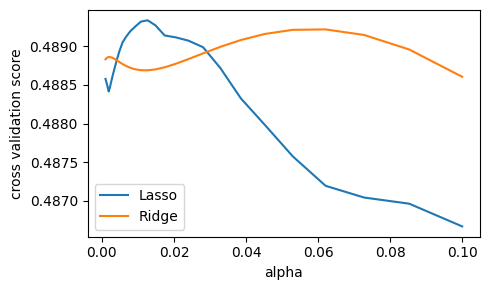

In [4]:
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)
plt.figure(figsize=(5, 3))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()